In [15]:
import numpy as np

data = np.array([[[0,1],[2,3],[4,5]],
                 [[6,7],[8,9],[10,11]],
                 [[12,13],[14,15],[16,17]],
                 [[18,19],[20,21],[22,23]],])

print(data.shape)

output = np.mean(data, axis=1)
print(output)
print(output.shape)

(4, 3, 2)
[[ 2.  3.]
 [ 8.  9.]
 [14. 15.]
 [20. 21.]]
(4, 2)


In [16]:
import numpy as np

data = np.array([[1,2,3],
                 [4,5,6],])

print(data.shape)

output = np.mean(data, axis=1)
print(output)
print(output.shape)

(2, 3)
[2. 5.]
(2,)


In [17]:
import numpy as np
points = np.array([[0,1],[2,3],[4,5],[5,2]])
indices = np.array([[0,1],[0,2],[0,3]])

edge = points[indices]
print(edge.shape)
print(edge)

(3, 2, 2)
[[[0 1]
  [2 3]]

 [[0 1]
  [4 5]]

 [[0 1]
  [5 2]]]


In [18]:
import numpy as np

points = np.array([[0,1],
                   [2,3],
                   [4,5],
                   [5,2]])

print(points.max(0))


[5 5]


$\lambda $
$$
f(x) = \int_{-\infty}^{\infty} e^{-x^2} dx
$$

In [19]:
import torch

w = torch.tensor([5], dtype=float, requires_grad=True)
b = torch.tensor([2], dtype=float, requires_grad=True)

y = w * 3 + b
y.backward()
b.requires_grad_(False)
y = w*4+b
y.backward()
b.requires_grad_(True)
y = w*4+b
y.backward()
print(w.grad)
print(b.grad)

tensor([11.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)


In [20]:
import torch

fake_data = torch.randn((100,3))
target = torch.ones_like(fake_data)
print(torch.nn.functional.mse_loss(fake_data, target))
print((fake_data-target).pow(2).mean())

fake_data = torch.nn.functional.sigmoid(fake_data)
print(torch.nn.functional.binary_cross_entropy(fake_data, target))


tensor(2.0551)
tensor(2.0551)
tensor(0.8148)


In [21]:
import torch
fake_data = torch.randn((100,3))
target_real_vertex = torch.FloatTensor(fake_data.size()).uniform_(0.9, 1.0)
print(target_real_vertex)

tensor([[0.9313, 0.9424, 0.9214],
        [0.9175, 0.9666, 0.9203],
        [0.9767, 0.9263, 0.9669],
        [0.9459, 0.9239, 0.9864],
        [0.9510, 0.9449, 0.9654],
        [0.9473, 0.9746, 0.9838],
        [0.9952, 0.9320, 0.9871],
        [0.9745, 0.9804, 0.9489],
        [0.9151, 0.9040, 0.9526],
        [0.9182, 0.9202, 0.9413],
        [0.9221, 0.9307, 0.9057],
        [0.9958, 0.9618, 0.9467],
        [0.9059, 0.9102, 0.9625],
        [0.9559, 0.9116, 0.9637],
        [0.9135, 0.9028, 0.9489],
        [0.9519, 0.9451, 0.9000],
        [0.9244, 0.9436, 0.9979],
        [0.9521, 0.9929, 0.9055],
        [0.9549, 0.9164, 0.9351],
        [0.9851, 0.9248, 0.9774],
        [0.9340, 0.9011, 0.9166],
        [0.9864, 0.9712, 0.9750],
        [0.9082, 0.9643, 0.9827],
        [0.9648, 0.9400, 0.9767],
        [0.9915, 0.9535, 0.9781],
        [0.9633, 0.9505, 0.9947],
        [0.9430, 0.9556, 0.9058],
        [0.9070, 0.9672, 0.9115],
        [0.9714, 0.9432, 0.9370],
        [0.953

In [22]:
import torch

fake_data = torch.randn((5,3))
layer_1 = torch.nn.Linear(3,1)
layer_2 = torch.nn.Linear(1,1)
target_real_vertex = torch.ones((5,1))

predict = layer_1(fake_data)
predict = predict.detach()
print(predict)
predict = layer_2(predict)
loss_value = torch.nn.functional.mse_loss(predict, target_real_vertex)
optimizer_1 = torch.optim.Adam(layer_1.parameters(), lr=0.1)
optimizer_2 = torch.optim.Adam(layer_2.parameters(), lr=0.1)

loss_value.backward()
optimizer_1.step()
optimizer_2.step()
predict_again = layer_1(fake_data)
print(predict_again)

tensor([[-0.0952],
        [ 0.2405],
        [ 0.1302],
        [-0.4918],
        [ 0.1349]])
tensor([[-0.0952],
        [ 0.2405],
        [ 0.1302],
        [-0.4918],
        [ 0.1349]], grad_fn=<AddmmBackward0>)


In [23]:
import torch

a = torch.tensor([[1,1,1,1],
                  [4,5,6,6]], dtype=float)

b = torch.tensor([[-2,-2,-2,-2],
                  [1,1,1,2]], dtype=float)

print(torch.nn.functional.cosine_similarity(a, b, dim=1))

tensor([-1.0000,  0.9600], dtype=torch.float64)


In [24]:
import torch

a = torch.ones((3))
a = a if len(a.size())==2 else a.unsqueeze(0)
print(a.size())

torch.Size([1, 3])


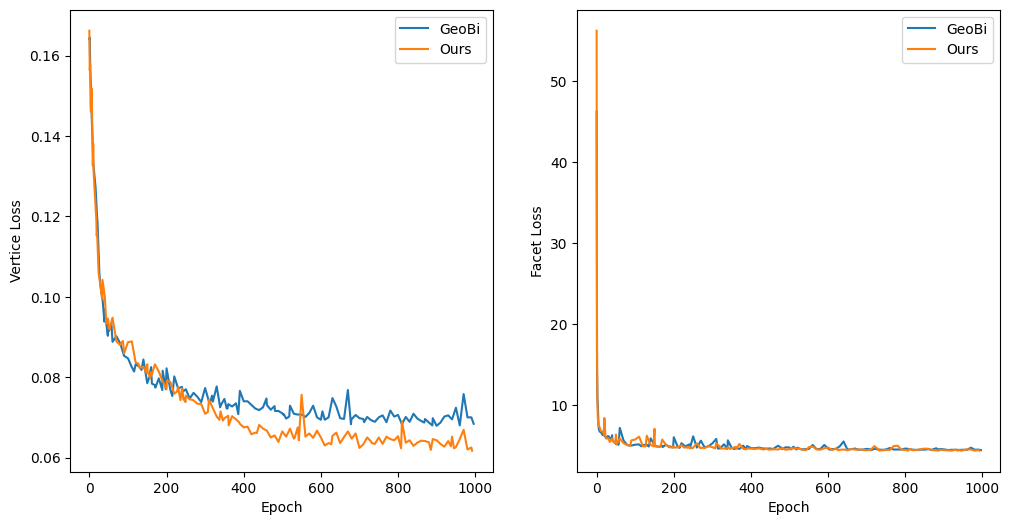

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import os
# plt.rcParams.update({'font.size': 14})

# Read file from CSV file
geobi_df = pd.read_csv(r"..\log\GeoBi-GNN_Synthetic_train\train_geo_bi\excel.csv")
ours_df = pd.read_csv(r"..\log\GeoBi-GNN_Synthetic_train\train_gan\excel.csv")

geobi_df.head()
# Plot vertice loss
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(geobi_df["epoch"], geobi_df["vertice_error"], label="GeoBi")
plt.plot(ours_df["epoch"], ours_df["vertice_error"], label="Ours")
plt.xlabel("Epoch")
plt.ylabel("Vertice Loss")
plt.legend()

# Plot facet loss
plt.subplot(1, 2, 2)
plt.plot(geobi_df["epoch"], geobi_df["facet_error"], label="GeoBi")
plt.plot(ours_df["epoch"], ours_df["facet_error"], label="Ours")
plt.xlabel("Epoch")
plt.ylabel("Facet Loss")
plt.legend()

plt.show()


In [26]:
import openmesh as om
import numpy as np
import pyvista as pv

file = "block_n1.obj"
mesh = pv.read(file)


points = mesh.points
faces = np.reshape(mesh.faces,(-1,4))[:,1:]

print(points.shape)
print(faces.shape)


openmesh_mesh = om.TriMesh()
openmesh_mesh.add_vertices(points)
openmesh_mesh.add_faces(faces)

print(openmesh_mesh.points().shape)
print(openmesh_mesh.fv_indices().shape)
# for face in faces:
    # h0,h1,h2 = 
    # openmesh_mesh.add_face(*face)
# print(openmesh_mesh)


FileNotFoundError: File (e:\thesis\3D-Reconstruction\src\train\block_n1.obj) not found

In [ ]:

with open("block_n1.obj") as f:
    mesh = om.read_trimesh(file)
    print(type(f))
    print(mesh.points().shape)

<class '_io.TextIOWrapper'>
(8771, 3)


In [ ]:
import torch
from torch_geometric.utils import degree
x_i = torch.tensor([[1,2,3,4,5,6]], dtype=float)
x_j = torch.tensor([[1,1,1,2,3,4]], dtype=float)
out_channels = 3
head = 8
u = torch.nn.Linear(6,head,dtype=float)
lin = torch.nn.Linear(6,head*out_channels,dtype=float)

q = u(x_j-x_i) + 7
q = torch.nn.functional.softmax(q,dim=1)
print(q.shape)
result = lin(x_j)
result = result.view(result.size(0), head,-1)
print(result.shape)

q = q.view(-1, head, 1)
print(q.shape)
print((result*q).sum(dim=1))


torch.Size([1, 8])
torch.Size([1, 8, 3])
torch.Size([1, 8, 1])
tensor([[-0.3847, -0.2522,  0.8141]], dtype=torch.float64,
       grad_fn=<SumBackward1>)


c:\Users\nguye\anaconda3\envs\python_3d\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


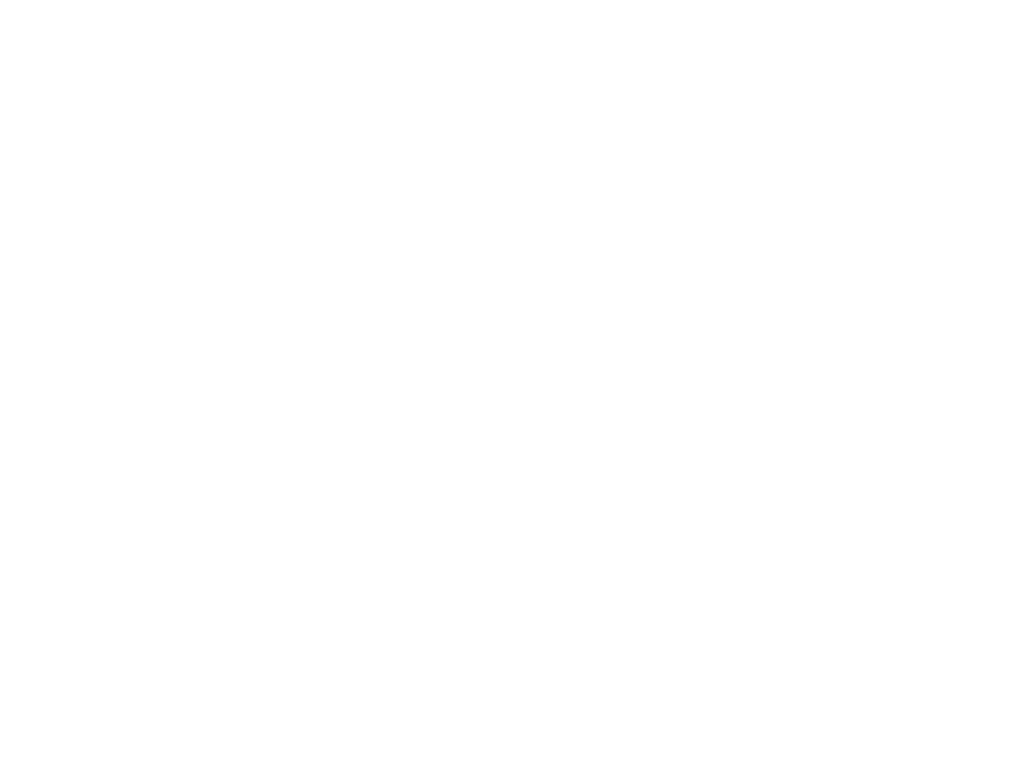

c:\Users\nguye\anaconda3\envs\python_3d\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


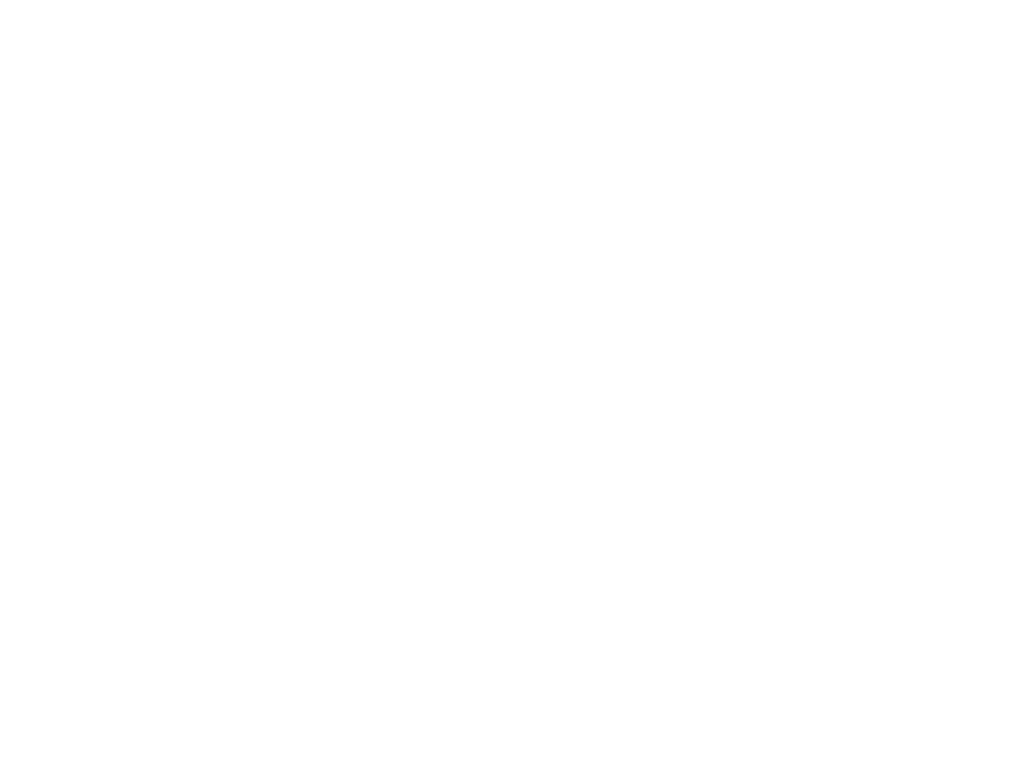

c:\Users\nguye\anaconda3\envs\python_3d\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


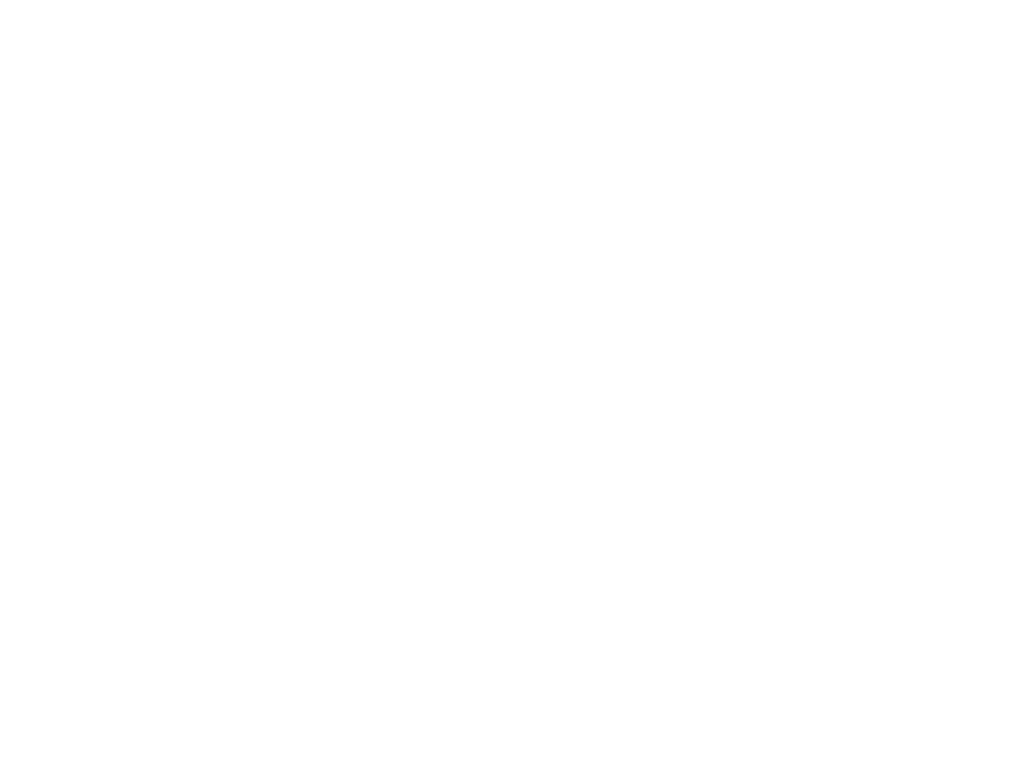

ValueError: Invalid file extension for this data type. Must be one of: dict_keys(['.vtu', '.vtk'])

In [4]:
import pyvista as pv
from pyvista import examples

# Load a surface to voxelize
# cpos = [
#     (7.656346967151718, -9.802071079151158, -11.021236183314311),
#     (0.2224512272564101, -0.4594554282112895, 0.5549738359311297),
#     (-0.6279216753504941, -0.7513057097368635, 0.20311105371647392),
# ]
cpos = [(0.2, 0.3, 2), (0, 0, 0), (0, 1, 0)]
# surface = pv.Sphere(center=(0, 0, 0), radius=0.5, phi_resolution=20, theta_resolution=20)
surface = pv.read("TuongBaNguHanh11.obj")

# Mesh
p1 = pv.Plotter()
surface.plot(cpos=cpos, show_edges=True, show_axes=False)
# Point cloud
surface.plot(style="points",cpos=cpos, point_size=20, show_axes=False)

# Voxel
voxels = pv.voxelize(surface, density=surface.length / 70, check_surface=False)
voxels.plot(show_edges=True, cpos=cpos, show_axes=False)
voxels.save("test.obj")

In [5]:
import torch

# in:5
# out: 6
# head: 2
# neighbor, feature: (3,5)
# q: (3,2) after softmax q:(3,2)
# x_j: (3, 12) after view x_j:(3,2,6)
# q after view q:(3,2,1)
# x_j*q_view: (3,2,6)
# after sum (3,6)
x_j = torch.rand(3,2,6)
q_view = torch.rand(3,2,1)

result = x_j*q_view
print(result.size())
result = result.sum(dim=1)
print(result.size())

torch.Size([3, 2, 6])
torch.Size([3, 6])
